In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader

from utils import (
    convert_to_np,
    DTS,
    train
)
from model import BaseModel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
name = 'COINnoaggl.csv'
train_pth = f'../data/train/{name}'
test_pth = f'../data/test/{name}'

In [4]:
train_df = pd.read_csv(train_pth, converters={'emb': convert_to_np})
test_df = pd.read_csv(test_pth, converters={'emb': convert_to_np})
print(len(train_df), len(test_df))
train_df.head(1)

7642 2351


,id,cls_name,cls,subset,url,emb
0,NLy71UrHElw,PractisePoleVault,116,training,https://www.youtube.com/embed/NLy71UrHElw,"[-3.47479105, -6.24204493, -10.6543608, -4.748..."


## sklearn

In [5]:
Xtrain = np.vstack(train_df['emb'])
Xtest = np.vstack(test_df['emb'])
print(Xtrain.shape, Xtest.shape)

ytrain = np.array(train_df['cls'])
ytest = np.array(test_df['cls'])
print(ytrain.shape, ytest.shape)

(7642, 1024) (2351, 1024)
(7642,) (2351,)


In [6]:
tsne = TSNE(n_components=2, learning_rate='auto',
            init='random', perplexity=3)

In [46]:
XtrainE = tsne.fit_transform(Xtrain)
XtestE = tsne.fit_transform(Xtest)

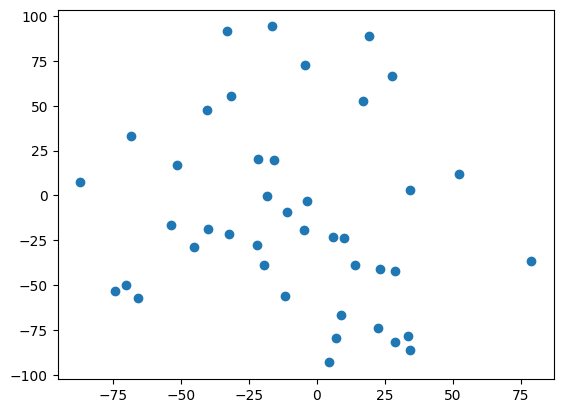

In [52]:
sub = XtrainE[train_df['cls'] == 179]
plt.scatter(sub[:, 0], sub[:, 1], )

In [13]:
clf = SVC(gamma='auto')
# clf = BernoulliNB()
# clf = GaussianNB()

In [14]:
clf.fit(Xtrain, ytrain)

SVC(gamma='auto')

In [15]:
y_pred = clf.predict(Xtest)
score = accuracy_score(ytest, y_pred)
print(score)

0.011484474691620587


## NNs

In [27]:
trainset = DTS(train_pth)
testset = DTS(test_pth)
trian_loader = DataLoader(trainset, batch_size=10)
test_loader = DataLoader(testset, batch_size=10)

In [28]:
model = BaseModel()

In [29]:
device = torch.device('cuda:0')
optimizer = torch.optim.AdamW(model.parameters())

In [2]:
# train(
#     100,
#     model,
#     trian_loader,
#     test_loader,
#     optimizer,
#     device,
#     '../experiments/BaseModel0/'
# )

## Results

In [5]:
def plot_results(res_pth):
    df = pd.read_csv(res_pth)
    acc, *_, train_l, test_l = (df[col] for col in df.columns)
    xs = np.arange(len(acc))
    fig, (loss, accs) = plt.subplots(1, 2, figsize=(15, 5))
    loss.plot(xs, train_l, color='green', label='train_loss')
    loss.plot(xs, test_l, color='blue', label='test_loss')
    accs.plot(xs, acc, color='red', label='accuracy')
    loss.legend()
    print(np.max(acc))
    fig.show()

0.3236920459378987


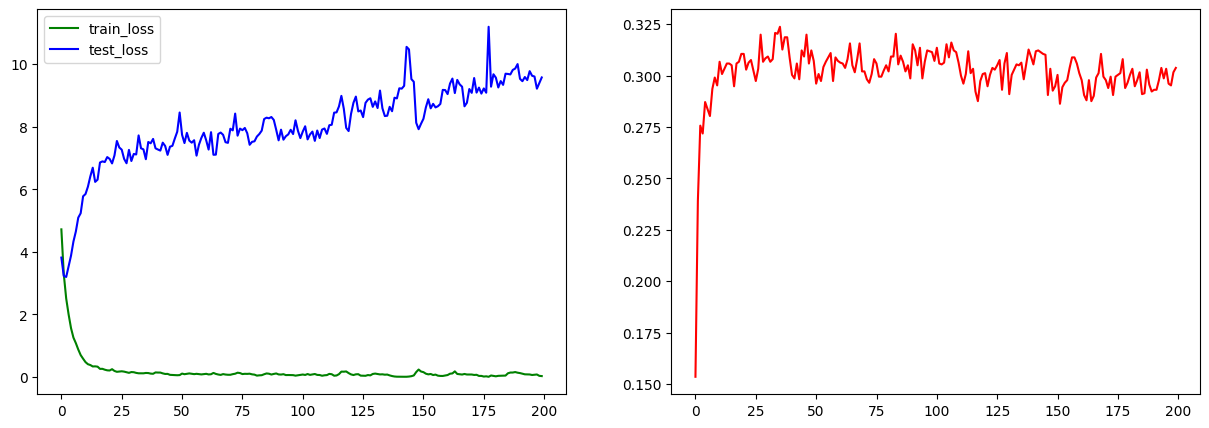

In [15]:
res_pth = '../experiments/basel1/res.csv'
plot_results(res_pth)